<a href="https://colab.research.google.com/github/Serena-24/NativeSoftTech-/blob/main/CNN%20MODEL(task-2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Tensorflow

import tensorflow as tf
from tensorflow import keras

#PyTorch

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms

#Numpy

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#TensorFlow - Getting and Splitting the Dataset

fashion_mnist = keras.datasets.fashion_mnist
(train_images_tf, train_labels_tf), (test_images_tf, test_labels_tf) = fashion_mnist.load_data()


#PyTorch - Getting and Splitting the Dataset

transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_dataset_pytorch = torchvision.datasets.FashionMNIST(root='./data/',
                                             train=True,
                                             transform=transforms,
                                             download=True)
test_dataset_pytorch = torchvision.datasets.FashionMNIST(root='.data/',
                                             train=False,
                                             transform=transforms,
                                             download=True)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 5.95MB/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:00<00:00, 59.0MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 16.2MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 26.4M/26.4M [00:00<00:00, 114MB/s]


Extracting .data/FashionMNIST/raw/train-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 5.73MB/s]

Extracting .data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to .data/FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:00<00:00, 56.5MB/s]


Extracting .data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.0MB/s]

Extracting .data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to .data/FashionMNIST/raw



9


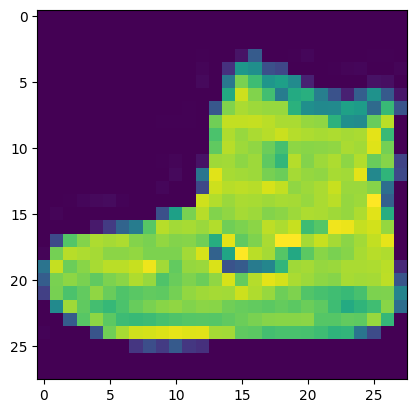

In [ ]:
#TensorFlow - Loading the Data
def imshowTensorFlow(img):
  plt.imshow(img)
imshowTensorFlow(train_images_tf[0])

print(train_labels_tf[0])


In [ ]:
def imshowPytorch(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset_pytorch,
                                           batch_size=32,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset_pytorch,
                                          batch_size=32,
                                          shuffle=False)


Labels: [9 0 0 3 0 2 7 2]


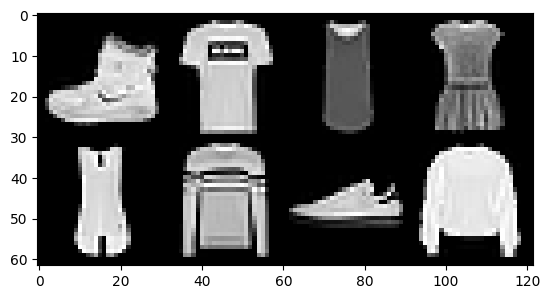

In [ ]:
try:
    data_iter = iter(train_loader)
    images, labels = next(data_iter)  # Using next() function
except StopIteration:
    print("The DataLoader is empty.")
except Exception as e:
    print(f"An error occurred: {e}")

# Proceed to visualize or process the images and labels
imshowPytorch(torchvision.utils.make_grid(images[:8], nrow=4))  # Display the first 8 images
print("Labels:", labels[:8].numpy())  # Print the labels for the first 8 images

In [ ]:
#TensorFlow - Building the Model
modeltf = keras.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1), filters=6, kernel_size=5, strides=1, padding="same", activation=tf.nn.relu),
    keras.layers.AveragePooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(16, kernel_size=5, strides=1, padding="same", activation=tf.nn.relu),
    keras.layers.AveragePooling2D(pool_size=2, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation=tf.nn.relu),
    keras.layers.Dense(84, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#PyTorch - Building the Model
class NeuralNet(nn.Module):
    def __init__(self, num_of_class):
        super(NeuralNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2))
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
        )
        self.classifier = nn.Linear(84, 10)

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(-1, 16*5*5)
        x = self.fc_model(x)
        x = self.classifier(x)
        return x

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define input shape and number of classes
input_shape = 20  # Example input size
num_classes = 10  # Number of classes

# Define the model
modeltf = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
modeltf.compile(loss=keras.losses.CategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

# Print model summary
modeltf.summary()

# Example data (randomly generated for demonstration)
import numpy as np

# Generate random data
x_train = np.random.rand(1000, input_shape)  # 1000 samples
y_train = keras.utils.to_categorical(np.random.randint(num_classes, size=(1000, 1)), num_classes)

# Train the model
modeltf.fit(x_train, y_train, epochs=10, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,994 (7.79 KB)

 Trainable params: 1,994 (7.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0877 - loss: 2.3581
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1065 - loss: 2.3062 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1181 - loss: 2.2908 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1529 - loss: 2.2813
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1531 - loss: 2.2773
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1457 - loss: 2.2780
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1457 - loss: 2.2758 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1230 - loss: 2.2757 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1520 - loss: 2.2700 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1691 - loss: 2.2581 


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming train_images_tf, test_images_tf, train_labels_tf, test_labels_tf are already defined

# Preprocess the data
train_images_tensorflow = (train_images_tf / 255.0).reshape(train_images_tf.shape[0], 28, 28, 1)
test_images_tensorflow = (test_images_tf / 255.0).reshape(test_images_tf.shape[0], 28, 28, 1)
train_labels_tensorflow = keras.utils.to_categorical(train_labels_tf)
test_labels_tensorflow = keras.utils.to_categorical(test_labels_tf)

# Define a simple CNN model
modeltf = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

# Compile the model
modeltf.compile(loss=keras.losses.CategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

# Train the model
modeltf.fit(train_images_tensorflow, train_labels_tensorflow, epochs=30, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.7960 - loss: 0.5764
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.8954 - loss: 0.2913
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9088 - loss: 0.2509
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9192 - loss: 0.2185
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9283 - loss: 0.1938
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9368 - loss: 0.1725
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9429 - loss: 0.1557
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9484 - loss: 0.1396
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 21ms/step - accuracy: 0.9543 - loss: 0.1256
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9580 - loss: 0.1170
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9638 - loss: 0.1014
Epoch 12

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple model
modeltf = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Example input shape for MNIST
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
modeltf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Example training data (replace with your actual data)
train_images = np.random.rand(60000, 28, 28)  # 60,000 samples of 28x28 images
train_labels = np.random.randint(0, 10, 60000)  # 60,000 labels for 10 classes

# Train the model
modeltf.fit(train_images, train_labels, epochs=5)

# Example test data
test_images_tf = np.random.rand(100, 28, 28)  # 100 samples of 28x28 images
test_labels_tf = np.random.randint(0, 10, 100)  # 100 labels for 10 classes

# Make predictions
predictions = modeltf.predict(test_images_tf)
correct = 0
for i, pred in enumerate(predictions):
    if np.argmax(pred) == test_labels_tf[i]:
        correct += 1

# Calculate and print accuracy
accuracy = 100 * correct / test_images_tf.shape[0]
print('Test Accuracy of the model on the {} test images: {:.2f}% with TensorFlow'.format(test_images_tf.shape[0], accuracy))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1006 - loss: 2.3206
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1028 - loss: 2.3028
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0991 - loss: 2.3028
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0996 - loss: 2.3027
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1015 - loss: 2.3027
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Test Accuracy of the model on the 100 test images: 16.00% with TensorFlow
